In [2]:
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelEncoder

In [3]:
(train2_images, train2_labels), (test2_images, test2_labels) = cifar10.load_data()

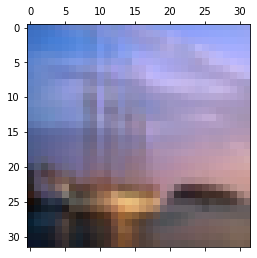

In [4]:
plt.matshow(train2_images[309])

In [4]:
train2_labels[309]

array([8], dtype=uint8)

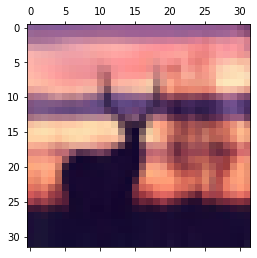

In [5]:
plt.matshow(test2_images[211])

In [6]:
test2_labels[211]

array([4], dtype=uint8)

In [7]:
train2_images.shape

(50000, 32, 32, 3)

In [8]:
train2_images[0].shape

(32, 32, 3)

In [9]:
test2_images.shape

(10000, 32, 32, 3)

In [10]:
test2_images[0].shape

(32, 32, 3)

In [11]:
cflabels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
train2_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
train2_labels[309]

array([8], dtype=uint8)

In [14]:
test2_labels[211]

array([4], dtype=uint8)

In [15]:
type(train2_labels)

numpy.ndarray

In [16]:
len(train2_labels)

50000

In [17]:
train2_labels.shape

(50000, 1)

In [18]:
type(test2_labels)

numpy.ndarray

In [19]:
len(test2_labels)

10000

In [20]:
test2_labels.shape

(10000, 1)

In [21]:
cflabels = LabelEncoder().fit_transform(cflabels)

In [22]:
cflabels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [23]:
train2_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
train2_images = train2_images / 255.0
test2_images = test2_images / 255.0

In [25]:
train2_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [26]:
test2_images

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [11]:
# cimod1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, kernel_size = (5, 5), activation='relu', input_shape=(32, 32, 3)),
#     tf.keras.layers.MaxPooling2D(1,1),
    
#     tf.keras.layers.Conv2D(64, kernel_size = (5, 5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(1,1),
    
#     tf.keras.layers.Conv2D(64, kernel_size = (5, 5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(1,1),
    
#     tf.keras.layers.Conv2D(64, kernel_size = (5, 5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(1,1),
    
#     tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
    
#     tf.keras.layers.Dense(10, activation='softmax')    
# ])

In [14]:
cimod1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(1,1),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(1,1),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(1,1),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(10, activation='softmax')    
])

In [15]:
cimod1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
cimod1.fit(train2_images, train2_labels, epochs = 1)

1563/1563 [==============================] - 486s 311ms/step - loss: 2.4310 - accuracy: 0.1007


In [30]:
n1 = tensorflow.constant([1, 2, 77])
print(n1)

tf.Tensor([ 1  2 77], shape=(3,), dtype=int32)


In [31]:
n2 = tensorflow.Variable([22, 17, 65])

In [32]:
n2

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([22, 17, 65])>

In [33]:
type(n2)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [34]:
n3 = tensorflow.constant([[34, 16, 11], [56, 88, 13], [12, 10, 66], [40, 60, 77], [-11, 65, 30]])

In [35]:
n3

<tf.Tensor: shape=(5, 3), dtype=int32, numpy=
array([[ 34,  16,  11],
       [ 56,  88,  13],
       [ 12,  10,  66],
       [ 40,  60,  77],
       [-11,  65,  30]])>

In [36]:
type(n3)

tensorflow.python.framework.ops.EagerTensor